<a href="https://colab.research.google.com/github/arunsechergy/EVA/blob/master/Assignment9/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime

print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-26 15:37:20.958129


In [2]:
!pip install --upgrade --no-deps --force-reinstall git+http://github.com/arunsechergy/AgentVision.git#egg=agentvision

  Cloning http://github.com/arunsechergy/AgentVision.git to /tmp/pip-install-b2n7zxn4/agentvision
  Running command git clone -q http://github.com/arunsechergy/AgentVision.git /tmp/pip-install-b2n7zxn4/agentvision
  Created wheel for agentvision: filename=agentvision-0.0.1-cp36-none-any.whl size=12415 sha256=1b91a1fa0b3179f88280ef434b82fb02cdca267cb664beb4a4ea5cfc96ad0b2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-lpurzsf2/wheels/81/af/2a/e070043590a198577e108f1491c6c14ebb9f305a91b0812d1b
Successfully built agentvision


In [3]:
import torch.nn as nn
import torch.nn.functional as F

from agentvision.base_model import BaseModel

In [4]:
class QuizModel(BaseModel):
    def __init__(self, dropout_value=0.25):
        self.dropout_value = dropout_value

        super(QuizModel, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.convblock3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.pool1 = nn.MaxPool2d(2, 2)

        self.convblock4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=(1, 1), bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock6 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.pool2 = nn.MaxPool2d(2, 2)

        self.convblock7 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(1, 1), dilation=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock8 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock9 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
    
        self.convblock10 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.gap = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.convblock11 = nn.Sequential(
            nn.Conv2d(128, 10, kernel_size=(1, 1), bias=False),
        )

    def forward(self, x):
        x1 = self.convblock1(x)  # x1 = Input
        x2 = self.convblock2(x1)  # x2 = x1
        x3 = self.convblock3(x1 + x2)  # x3 = x1 + x2
        x4 = self.pool1(x1 + x2 + x3)

        x4 = self.convblock4(x4)

        x5 = self.convblock5(x4)
        x6 = self.convblock6(x4 + x5)
        x7 = self.convblock6(x4 + x5 + x6)
        x8 = self.pool2(x5 + x6 + x7)

        x8 = self.convblock7(x8)

        x9 = self.convblock8(x8)
        x10 = self.convblock9(x8 + x9)
        x11 = self.convblock10(x8 + x9 + x10)

        x12 = self.gap(x11)
        x13 = self.convblock11(x12)

        x13 = x13.view(-1, 10)
        return x13

In [5]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 4.7MB/s 
     |████████████████████████████████| 952kB 14.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=a1fcdb9934c4bf4ca568b324a4d65ce7cc6ba8015cbe134badcbdba7d431f434
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
from agentvision.data_loader import ImageDataLoader
from agentvision.data_transform import CIFAR10Transforms
import albumentations as A

In [18]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [ A.RandomCrop(32, 32, p=0.8)
                     ,A.HorizontalFlip()
                     #,A.Cutout(num_holes=4)
                     ]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 128, True, 'CIFAR10', figure_size=(20,10))

Files already downloaded and verified
Files already downloaded and verified


In [8]:
import torch.nn as nn
import torch.nn.functional as F
from agentvision.learner import Learner

In [19]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=QuizModel(),loss_func=F.cross_entropy)

In [20]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

In [21]:
epoch = 39
lr = 0.01
cnn_learner.fit(epochs=epoch, lr=lr, step_size=7)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.586163878440857 Batch_id=390 Accuracy=35.66: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 2.2477, Accuracy: 2510/10000 (25.10%)

EPOCH: 1


Loss=1.3492170572280884 Batch_id=390 Accuracy=49.22: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.8006, Accuracy: 3724/10000 (37.24%)

EPOCH: 2


Loss=1.277907371520996 Batch_id=390 Accuracy=55.71: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.7132, Accuracy: 4274/10000 (42.74%)

EPOCH: 3


Loss=0.9231237173080444 Batch_id=390 Accuracy=59.78: 100%|██████████| 391/391 [00:22<00:00, 17.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6171, Accuracy: 4595/10000 (45.95%)

EPOCH: 4


Loss=0.9919002652168274 Batch_id=390 Accuracy=62.09: 100%|██████████| 391/391 [00:21<00:00, 17.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4809, Accuracy: 5068/10000 (50.68%)

EPOCH: 5


Loss=1.1417503356933594 Batch_id=390 Accuracy=64.31: 100%|██████████| 391/391 [00:22<00:00, 17.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2942, Accuracy: 5572/10000 (55.72%)

EPOCH: 6


Loss=0.9737610816955566 Batch_id=390 Accuracy=65.42: 100%|██████████| 391/391 [00:21<00:00, 17.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3223, Accuracy: 5598/10000 (55.98%)

EPOCH: 7


Loss=0.9530082941055298 Batch_id=390 Accuracy=68.47: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1510, Accuracy: 6043/10000 (60.43%)

EPOCH: 8


Loss=0.9188596606254578 Batch_id=390 Accuracy=68.79: 100%|██████████| 391/391 [00:21<00:00, 18.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2031, Accuracy: 5927/10000 (59.27%)

EPOCH: 9


Loss=0.8054070472717285 Batch_id=390 Accuracy=69.30: 100%|██████████| 391/391 [00:21<00:00, 18.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1715, Accuracy: 6033/10000 (60.33%)

EPOCH: 10


Loss=0.8598076105117798 Batch_id=390 Accuracy=69.25: 100%|██████████| 391/391 [00:21<00:00, 18.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1846, Accuracy: 6031/10000 (60.31%)

EPOCH: 11


Loss=0.9367045164108276 Batch_id=390 Accuracy=69.36: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1867, Accuracy: 6000/10000 (60.00%)

EPOCH: 12


Loss=0.7697005867958069 Batch_id=390 Accuracy=69.27: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1834, Accuracy: 5975/10000 (59.75%)

EPOCH: 13


Loss=0.8069877624511719 Batch_id=390 Accuracy=69.97: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1392, Accuracy: 6152/10000 (61.52%)

EPOCH: 14


Loss=0.8559602499008179 Batch_id=390 Accuracy=70.20: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1216, Accuracy: 6179/10000 (61.79%)

EPOCH: 15


Loss=0.7568488121032715 Batch_id=390 Accuracy=70.13: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1222, Accuracy: 6185/10000 (61.85%)

EPOCH: 16


Loss=1.1476256847381592 Batch_id=390 Accuracy=70.20: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1381, Accuracy: 6145/10000 (61.45%)

EPOCH: 17


Loss=0.733711838722229 Batch_id=390 Accuracy=70.32: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1188, Accuracy: 6196/10000 (61.96%)

EPOCH: 18


Loss=0.7795664072036743 Batch_id=390 Accuracy=70.35: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1357, Accuracy: 6146/10000 (61.46%)

EPOCH: 19


Loss=0.7379705309867859 Batch_id=390 Accuracy=70.47: 100%|██████████| 391/391 [00:20<00:00, 18.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1374, Accuracy: 6145/10000 (61.45%)

EPOCH: 20


Loss=0.7177016139030457 Batch_id=390 Accuracy=70.40: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1389, Accuracy: 6150/10000 (61.50%)

EPOCH: 21


Loss=0.8832496404647827 Batch_id=390 Accuracy=70.20: 100%|██████████| 391/391 [00:20<00:00, 18.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1425, Accuracy: 6137/10000 (61.37%)

EPOCH: 22


Loss=0.8118834495544434 Batch_id=390 Accuracy=70.52: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1552, Accuracy: 6116/10000 (61.16%)

EPOCH: 23


Loss=0.8801015615463257 Batch_id=390 Accuracy=70.40: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1177, Accuracy: 6194/10000 (61.94%)

EPOCH: 24


Loss=0.7888848781585693 Batch_id=390 Accuracy=70.34: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1364, Accuracy: 6176/10000 (61.76%)

EPOCH: 25


Loss=0.8594257235527039 Batch_id=390 Accuracy=70.33: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1249, Accuracy: 6188/10000 (61.88%)

EPOCH: 26


Loss=0.9684830904006958 Batch_id=390 Accuracy=70.60: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1137, Accuracy: 6216/10000 (62.16%)

EPOCH: 27


Loss=0.7773646116256714 Batch_id=390 Accuracy=70.38: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1282, Accuracy: 6166/10000 (61.66%)

EPOCH: 28


Loss=0.7921584844589233 Batch_id=390 Accuracy=70.52: 100%|██████████| 391/391 [00:21<00:00, 18.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1439, Accuracy: 6144/10000 (61.44%)

EPOCH: 29


Loss=1.0272905826568604 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]



Test set: Average loss: 1.1260, Accuracy: 6167/10000 (61.67%)



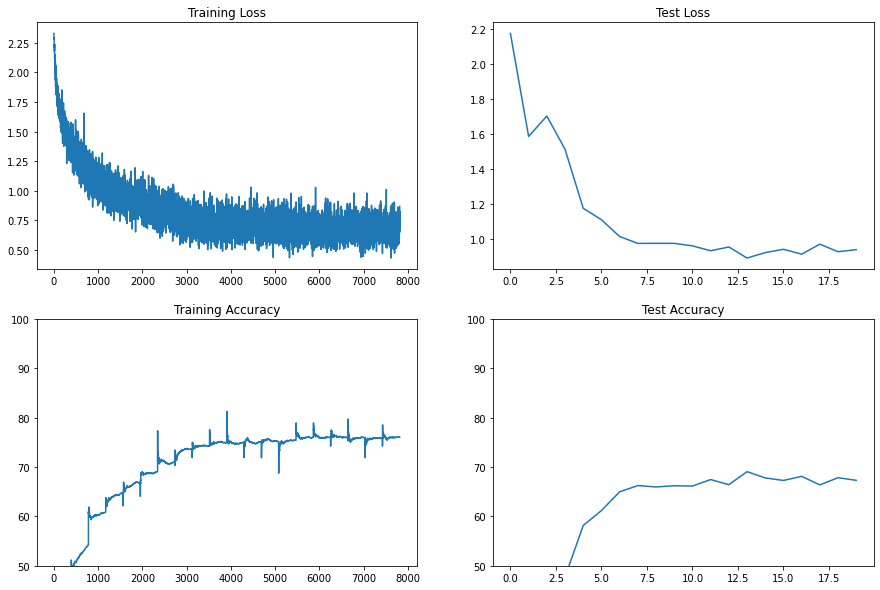

In [13]:
cnn_learner.plot_losses()